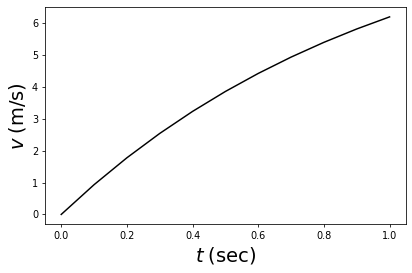

In [36]:
import numpy as np
import matplotlib.pyplot as plt
m = 1.0 #g
g = 9.8 #m/s^2
v_0 = 0. #m/s
beta = 1.0 #1/s
Nt = 10
t_arr = np.linspace(0,1.,Nt+1)

v_arr = m *g/beta + (v_0 - m*g/beta) *np.exp(-beta * t_arr/m)


fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(t_arr, v_arr,'-k',label = 'Analytic Solution')
plt.xlabel(r'$t\;(\rm sec)$',fontsize = 20)
plt.ylabel(r'$v\;(\rm m/s)$', fontsize = 20)
plt.tight_layout()

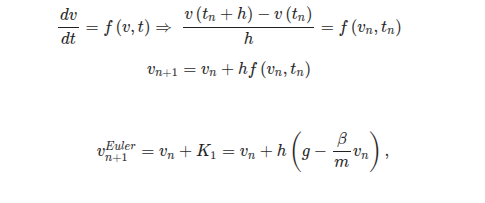

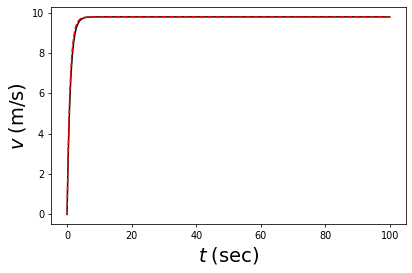

In [13]:
import numpy as np
import matplotlib.pyplot as plt
m = 1.0 #g
g = 9.8 #m/s^2
v_0 = 0. #m/s
beta = 1.0 #1/s
Nt = 500 # intervals
t_max = 100. # seconds
t_arr = np.linspace(0,t_max,Nt+1)
v_analytic = m *g/beta + (v_0 - m*g/beta) *np.exp(-beta * t_arr/m)

#-==
v_arr = np.zeros(Nt+1)
h = t_max / Nt

#v_n+1 = v_n  + h * (g - beta/m * v_n)
for n in range(Nt):
    v_arr[n+1] = v_arr[n] + h * (g - beta/m * v_arr[n])

#print (v_arr)

fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(t_arr, v_analytic,'-k',label = 'Analytic Solution')
plt.plot(t_arr, v_arr,'--r',label = 'Euler Solution')
plt.xlabel(r'$t\;(\rm sec)$',fontsize = 20)
plt.ylabel(r'$v\;(\rm m/s)$', fontsize = 20)
plt.tight_layout()

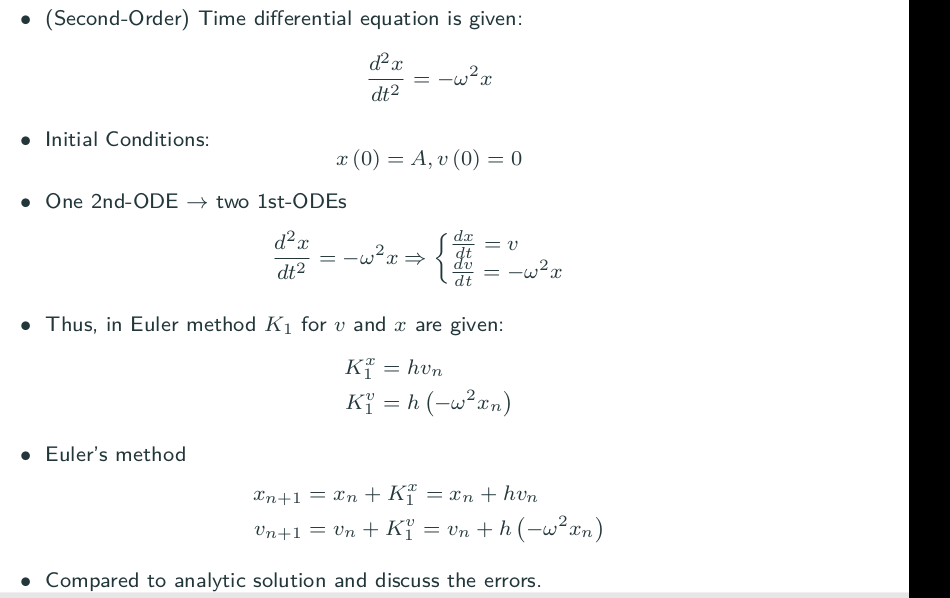


Text(0, 0.5, '$x\\;(\\rm m)$')

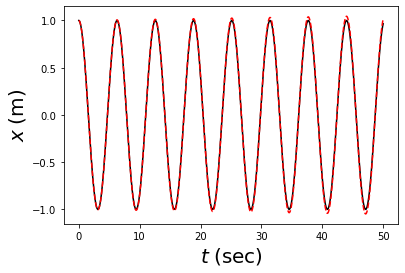

In [5]:
import numpy as np
import matplotlib.pyplot as plt
Nt = 5000*5 # intervals
t_max = 10. *5 # seconds
h = t_max / Nt 
t_arr = np.linspace(0,t_max,Nt+1)
x_arr = np.zeros(Nt+1)
v_arr = np.zeros(Nt+1)

omega = 1. # 
x_arr[0] = 1. # cm

for n in range(Nt):
    x_arr[n+1] = x_arr[n] + h * v_arr[n]
    v_arr[n+1] = v_arr[n] + h * (- omega**2. * x_arr[n])

x_analytic = 1.0 * np.cos(omega * t_arr)

plt.plot(t_arr, x_analytic, '-k',label = 'Analtyic Solution') 
plt.plot(t_arr, x_arr, '--r',label = 'Numerical Solution') 
plt.xlabel(r'$t\;(\rm sec)$',fontsize = 20)
plt.ylabel(r'$x\;(\rm m)$', fontsize = 20)